### Task 1: Programming - Bayesian Regression
Implement a the Bayesian Regression approach for 1D data using the data provided in points.txt. Divide the data randomly in training and test sets (50-50). 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### a)
Estimate $w_0 , w_1$ by Bayesian estimation as follows. 
	Assuming a Gaussian prior $p(\mathbf{w}) \sim\mathcal{N}(\mathbf{0},(1/\alpha) \mathbf{I})$ yields the posterior $p(\mathbf{w}|\mathcal{X}) \sim\mathcal{N}(\mathbf{\mu}_N, \Sigma_N)$, with
	 $$\mathbf{\mu}_N= \beta \Sigma_N \mathbf{X}^T\mathbf{y}, $$
	 $$\Sigma_N = (\alpha\mathbf{I} +\beta \mathbf{X}^T\mathbf{X})^{-1}, $$
	where $\mathbf{I}$ is the identity matrix, and $\mathbf{X}$ is the design matrix (= x values and column of 1). Set $\alpha=2$, $\beta=25$. To receive one estimate $\widehat{\mathbf{w}}=(\widehat{w}_0,~\widehat{w}_1)^T$, get one sample from the posterior $p(\mathbf{w}|\mathcal{X})$. 	
	</br>Hint: w = np.random.multivariate_normal(m_N.ravel(), S_N, num_w_samples).T 

In [6]:
df = pd.read_csv('points.txt', delimiter=' ', header=None, names=['x', 'y', 'nan']).drop('nan', axis=1)
df

,x,y
0,-1.00,-0.72
1,-0.21,-0.21
2,-0.12,0.01
3,0.05,0.10
4,0.17,0.20
5,0.22,0.28
6,0.35,0.39
7,0.51,0.51
8,0.55,0.59
9,0.62,1.00


In [7]:
#train test split
train = df.sample(frac=0.5)
test = df.drop(train.index)

In [8]:
a = 2
b = 25
I = np.eye(train.shape[1])
X = pd.DataFrame({'1': np.ones(train.shape[0]), 'x': train.x})
S_N = np.linalg.inv(a * I + b * X.T.dot(X))
S_N
m_N = b * S_N.dot(X.T).dot(train.y)
num_w_samples = 1

w = np.random.multivariate_normal(m_N.ravel(), S_N, num_w_samples).T
w

array([[0.04450411],
       [0.94511038]])

### b)
Create $10$ different estimates for lines from (a) by sampling $\widehat{\mathbf{w}}$ to predict $y_n$. From these different lines, estimate the average line.  Plot your results.

In [9]:
num_w_samples = 10
w10 = np.random.multivariate_normal(m_N.ravel(), S_N, num_w_samples).T
w10

array([[-0.09404719,  0.07524186,  0.00580127,  0.05618159,  0.18060401,
         0.00627722,  0.0713218 ,  0.08909112,  0.0816503 ,  0.07782155],
       [ 0.93234405,  1.16187912,  0.76064388,  0.99193836,  0.9921102 ,
         0.80090947,  0.89884193,  0.92698987,  1.1500544 ,  0.67124886]])

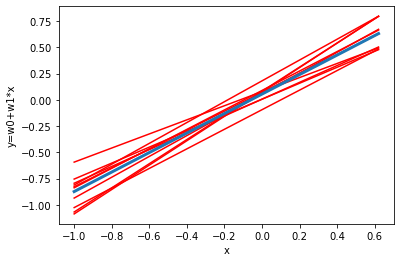

In [10]:
w0 = np.mean(w10[0])
w1 = np.mean(w10[1])

for i in range(10):
    sns.lineplot(x=test.x, y=w10[0][i] + w10[1][i] * test.x)
    plt.gca().lines[i].set_color("red")

sns.lineplot(x=test.x, y=w0 + w1 * test.x)
plt.ylabel('y=w0+w1*x')
plt.gca().lines[10].set_linewidth(3)

### c)
Approximate the true datapoints $(x_n,y_n)$ by computing the estimated values $\widehat{y}_n$ using the previously estimated parameters.

In [11]:
estimate_train = pd.DataFrame({'x':train.x, 'y':train.y, 'y_hat':w0 + w1 * train.x})
estimate_test = pd.DataFrame({'x':test.x, 'y':test.y, 'y_hat':w0 + w1 * test.x})
estimate_test

,x,y,y_hat
0,-1.00,-0.72,-0.873702
1,-0.21,-0.21,-0.140032
2,-0.12,0.01,-0.056449
5,0.22,0.28,0.259307
8,0.55,0.59,0.565777
9,0.62,1.00,0.630786
16,0.14,-0.08,0.185012
17,-0.19,-0.02,-0.121458
18,-0.17,0.01,-0.102884
19,-0.16,0.27,-0.093597


### d)

In [12]:
RMS_train = np.sqrt(np.mean((estimate_train.y - estimate_train.y_hat)**2))
print('estimate train:', RMS_train)

RMS_test = np.sqrt(np.mean((estimate_test.y - estimate_test.y_hat)**2))
print('estimate test:', RMS_test)

estimate train: 0.0648929258788754
estimate test: 0.19893208926089034


### Task 2: Programming Exercise - Bayesian Predictive Distribution
Replicate the Bayesian predictive distribution experiment shown in lecture. That is, assuming a flat prior, 

### a)
Create a sinusoidal dataset 
	 $$t(x) = \sin(2\pi x) + \chi,$$
	 where $x_i$, $i =1,\ldots,I$ are realisations of the random variable $X \sim \mathrm{Unif}([0 ,1])$
	 and
	 $\chi \sim N(0,0.3^2)$.

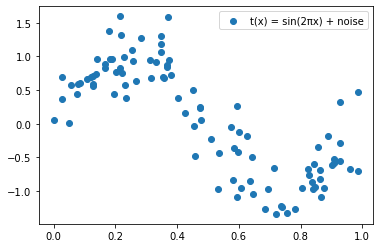

In [15]:
I = 100
X = np.random.uniform(0, 1, I)
noise = np.random.normal(0, 0.3, I)
t = np.sin(2 * np.pi * X) + noise

plt.scatter(X, t, label='t(x) = sin(2πx) + noise')
plt.legend()

### b)

Create the design matrix $\Phi^\mathrm{T}$ corresponding to the nine radial basis functions 
	$$\phi_j(x) = \exp \left(-\frac{(x-\mu_j)^2}{2 s^2}\right),~ j=1,\ldots,9.$$
	 Choose the parameters $\mu_j\in[0,1]$, and $s$.

In [64]:
mu_values = [0.2, 0.4, 0.42, 0.55, 0.6, 0.67, 0.8, 0.89, 1]
s = 0.5

design_matrix = np.zeros((len(X), len(mu_values)))

for i, x in enumerate(X):
    for j, mu in enumerate(mu_values):
        design_matrix[i, j] = np.exp(-(x-mu)**2/(2*s**2))

design_matrix_transposed = design_matrix.T
    
design_matrix_transposed.shape


(9, 100)

### c)

Create a function that returns the predictive mean $y(x,\mathbf{m}_N)$ in the function of $x$ and the function that computes the 
predictive standard deviation $\sigma_N(x)$ in the function of x.

In [68]:
def create_design_matrix(X, mu_values, s):
    design_matrix = np.zeros((len(X), len(mu_values)))

    for i, x in enumerate(X):
        for j, mu in enumerate(mu_values):
            design_matrix[i, j] = np.exp(-(x-mu)**2/(2*s**2))
    return design_matrix

def get_m_N(X, a, b, mu_values, s):
    I = np.eye(train.shape[1])
    X = pd.DataFrame({'1': np.ones(len(X)), 'x': X})
    S_N = np.linalg.inv(a * I + b * X.T.dot(X))
    m_N = b * S_N.dot(X.T).dot(train.y)
    return m_N

def predictive_mean(x, m_N, design_matrix):
    # Calculate the predictive mean y(x, m_N)
    phi_x = design_matrix  # Compute the design matrix at x
    y_x = np.dot(phi_x, m_N)
    return y_x

# def predictive_std_dev(x, design_matrix, S_N, s):
#     # Calculate the predictive standard deviation sigma_N(x)
#     phi_x = np.array([radial_basis_function(x, mu, s_value) for mu in mu_values])
#     sigma_N_x = s + np.dot(np.dot(phi_x, S_N), phi_x)
#     return np.sqrt(sigma_N_x)

In [69]:
a = 2
b = 25
mu_values = [0.2, 0.4, 0.42, 0.55, 0.6, 0.67, 0.8, 0.89, 1]
s = 0.5
x = 0.25
X = [x]

predictive_mean(x, get_m_N(X, a, b, mu_values, s), create_design_matrix(X, mu_values, s))

ValueError: shapes (2,1) and (10,) not aligned: 1 (dim 1) != 10 (dim 0)

### d)
Plot the predictive mean $y(x,\mathbf{m}_N)$ and the confidence intervals $y(x,\mathbf{m}_N) \pm \sigma_N(x)$, together with the ground truth simulated observations, for $I=1,2,4,25$.

## Task 3: Programming Exercise - Classification
The provided iris data consists of a total of 150 samples $\mathbf{x}_n \in \mathbb{R}^{4}$, $n=1,\ldots,150$, of three classes, where each data point has 4 dimensions. 


### a)
Read the data and the labels, and plot the data. (For reference: Each of the three classes has 50 samples each.


In [16]:
df = pd.read_csv('iris.csv', names=['x1', 'x2', 'x3', 'x4', 'label'])
df

,x1,x2,x3,x4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


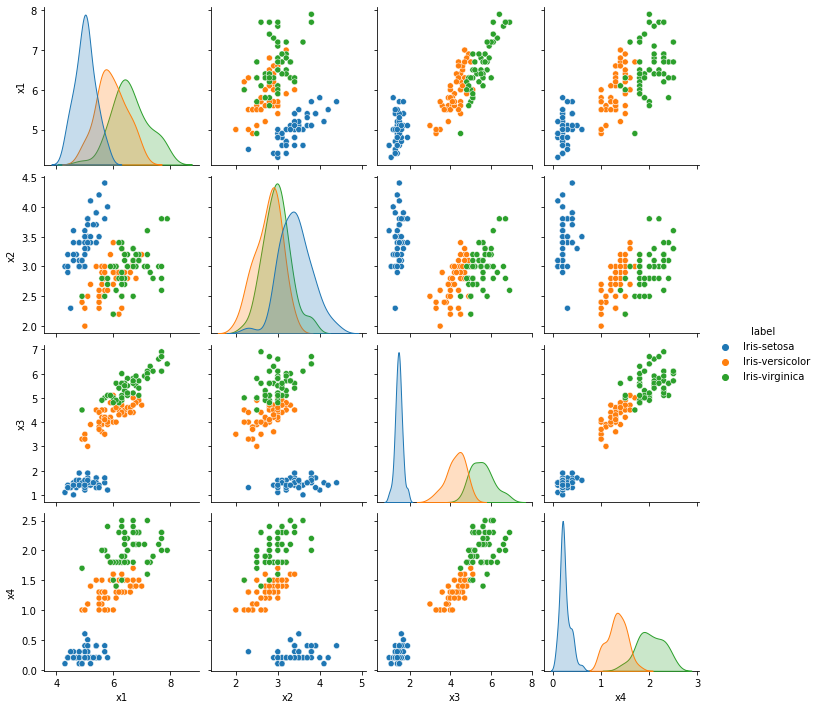

In [17]:
sns.pairplot(df, hue='label')


### b)
For each class, compute the sample mean $\widehat{\mathbf{\mu}}_k\in\mathbb{R}^4$, $k=1,\ldots, 3$
  $$\widehat{\mathbf{\mu}}_k = \frac{1}{N_k}\sum_{\mathbf{x}_n\in \mathcal{C}_k} \mathbf{x}_n, $$
  where $N_k=50$ is the number of samples for each class. 

In [18]:
iris_features = df[['x1', 'x2', 'x3', 'x4']]
iris_labels = df['label']

In [19]:
sample_means = []
classes = np.unique(iris_labels)
for k in classes:
    mi_k = iris_features[iris_labels == k].mean()
    sample_means.append(mi_k)
print(sample_means)

[x1    5.006
x2    3.418
x3    1.464
x4    0.244
dtype: float64, x1    5.936
x2    2.770
x3    4.260
x4    1.326
dtype: float64, x1    6.588
x2    2.974
x3    5.552
x4    2.026
dtype: float64]


### c)
For each class, compute the sample covariance matrix $\widehat{\mathbf{\Sigma}}_k\in\mathbb{R}^{4\times 4}$, $k=1,\ldots, 3$ 
    $$\widehat{\mathbf{\Sigma}}_k = \frac{1}{N_k}\sum_{\mathbf{x}_n\in \mathcal{C}_k} \left(\mathbf{x}_n -\widehat{\mathbf{\mu}}_k\right)\left(\mathbf{x}_n -\widehat{\mathbf{\mu}}_k\right)^T $$

In [112]:
num_features = iris_features.shape[1]
class_cov_matrices = []

for i, k in enumerate(classes):
    class_data = iris_features[iris_labels == k]
    Nk = len(class_data)
    class_mean = np.mean(sample_means[i])
    S_k = np.zeros((num_features, num_features))
    diff = iris_features[iris_labels == k] - sample_means[0]
    diff_mean = diff.mean()
    outer_product = np.outer(diff_mean, diff_mean)
    class_cov_matrices.append(outer_product)

class_cov_matrices


[array([[ 4.31980232e-31, -3.91117237e-31,  1.45939267e-32,
          6.27538850e-32],
        [-3.91117237e-31,  3.54119660e-31, -1.32134202e-32,
         -5.68177067e-32],
        [ 1.45939267e-32, -1.32134202e-32,  4.93038066e-34,
          2.12006368e-33],
        [ 6.27538850e-32, -5.68177067e-32,  2.12006368e-33,
          9.11627384e-33]]),
 array([[ 0.8649  , -0.60264 ,  2.60028 ,  1.00626 ],
        [-0.60264 ,  0.419904, -1.811808, -0.701136],
        [ 2.60028 , -1.811808,  7.817616,  3.025272],
        [ 1.00626 , -0.701136,  3.025272,  1.170724]]),
 array([[ 2.502724, -0.702408,  6.467216,  2.819124],
        [-0.702408,  0.197136, -1.815072, -0.791208],
        [ 6.467216, -1.815072, 16.711744,  7.284816],
        [ 2.819124, -0.791208,  7.284816,  3.175524]])]

### d)
Compute the joint covariance matrix 
  $$\widehat{\mathbf{\Sigma}} = \sum_{k=1}^K \frac{N_k}{N}\widehat{\mathbf{\Sigma}}_k, $$
  where $N_k$ defines the number of samples of class $k$, and $N=150$ refers to the total number of samples.

In [115]:
joint_covariance_matrix = np.sum(class_cov_matrices, axis=0)/3
joint_covariance_matrix

array([[ 1.12254133, -0.435016  ,  3.02249867,  1.275128  ],
       [-0.435016  ,  0.20568   , -1.20896   , -0.497448  ],
       [ 3.02249867, -1.20896   ,  8.17645333,  3.436696  ],
       [ 1.275128  , -0.497448  ,  3.436696  ,  1.44874933]])

### e)
Compute the three class-specific discriminant functions 
    $$a_k\left(\mathbf{x}\right) = \mathbf{w}_k^T \mathbf{x} + w_{k0}, $$
    using the previous results from task (b), and task (d), by
    $$\mathbf{w}_k =\widehat{\mathbf{\Sigma}}^{-1} \widehat{\mathbf{\mu}}_k $$
    $$w_{k0} = \frac{1}{2} \widehat{\mathbf{\mu}}_k^T \widehat{\mathbf{\Sigma}}^{-1} \widehat{\mathbf{\mu}}_k +\ln(\mathbb{P}(\mathcal{C}_k)), $$
    where $\mathbb{P}(\mathcal{C}_k) = \frac{N_k}{N}$.

In [1]:
for i, k in enumerate(classes):
    w_K = np.linalg.inv(joint_covariance_matrix).dot(sample_means[i])
    print(w_K)

NameError: name 'classes' is not defined

### f)
Assume each class is defined by a 4D Gaussian distribution $\mathcal{N}(\widehat{\mathbf{\mu}}_k,\widehat{\mathbf{\Sigma}})$. Get two new samples $\mathbf{x}_m^{(k)}\in\mathbb{R}^4$, $m=1,2$ for each class $k$.
	Hint: Check  https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html  

### g)
Classify the new samples from the previous step (f) using the discriminant functions in step (e). This is done by computing $a_1(\mathbf{x}_m^{(k)})$, $a_2(\mathbf{x}_m^{(k)})$, and $a_3(\mathbf{x}_m^{(k)})$. Then assign the class $j$ by $j=\text{argmax}_{k} a_k$. <br/>
	Are the new samples $\mathbf{x}_m$ from step (f) correctly classified? 
	If not which classes are confused with one-another?

### *h)
Additional non-mandatory task:
Select 2 of the 4 features and repeat steps (a)-(g) in the lower dimensional space. 